# 911 Project

In [1]:
import scipy as stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import chart_studio.plotly as py
from plotly.offline import  download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [8]:
df['title'].nunique()

148

In [9]:
df['reason'] = df['title'].apply(lambda x : x.split(':')[0])

In [10]:
df['reason'].value_counts().head(1)

EMS    332692
Name: reason, dtype: int64

In [11]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='reason', ylabel='count'>

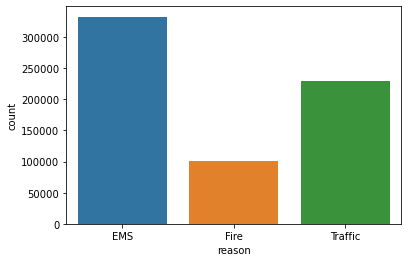

In [12]:
sns.countplot(df['reason'])

In [13]:
type(df['timeStamp'][0])

str

In [14]:
df['timeStamp']  = pd.to_datetime(df['timeStamp'])

In [15]:
df['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: timeStamp, Length: 663522, dtype: datetime64[ns]

In [16]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [17]:
df['Hour'] = df['timeStamp'].apply(lambda time : time.hour)
df['Month'] = df['timeStamp'].apply(lambda time : time.month)


In [18]:
df['Day of Week'] = df['timeStamp'].apply(lambda time : time.day_of_week)

In [19]:
df['Day of Week']

0         3
1         3
2         3
3         3
4         3
         ..
663517    2
663518    2
663519    2
663520    2
663521    2
Name: Day of Week, Length: 663522, dtype: int64

In [20]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [21]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [22]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,15,7,Wed
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,15,7,Wed
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,15,7,Wed
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,15,7,Wed


<AxesSubplot:xlabel='Day of Week', ylabel='count'>

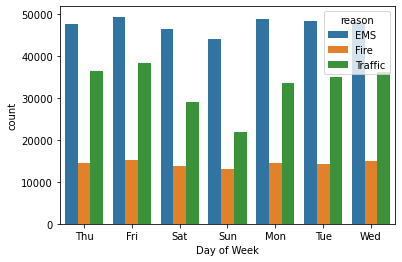

In [23]:
sns.countplot(x = df['Day of Week'],hue=df['reason'])

In [24]:
byMonth = df.groupby(['Month']).count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


<AxesSubplot:xlabel='Month'>

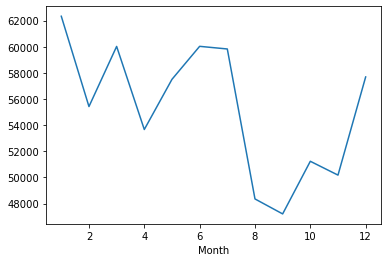

In [25]:
byMonth['lat'].plot()

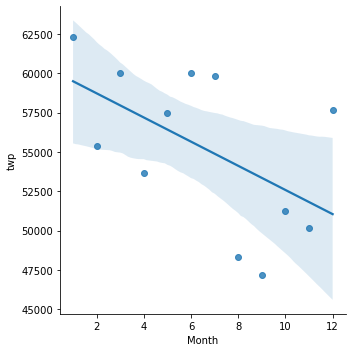

In [26]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [27]:
t = df['timeStamp'].iloc[0]

In [28]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

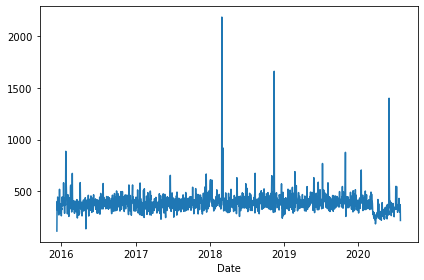

In [29]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

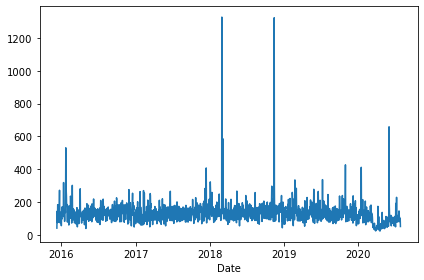

In [30]:
df[df['reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

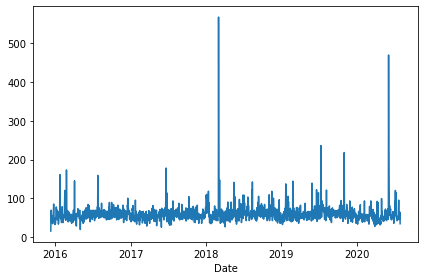

In [31]:
df[df['reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

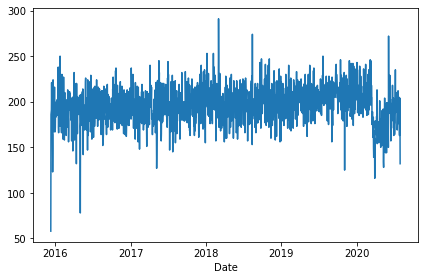

In [32]:
df[df['reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [33]:
x = df.groupby(by=['Day of Week','Hour']).count()['reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

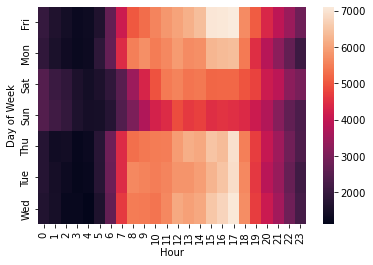

In [34]:
sns.heatmap(x)

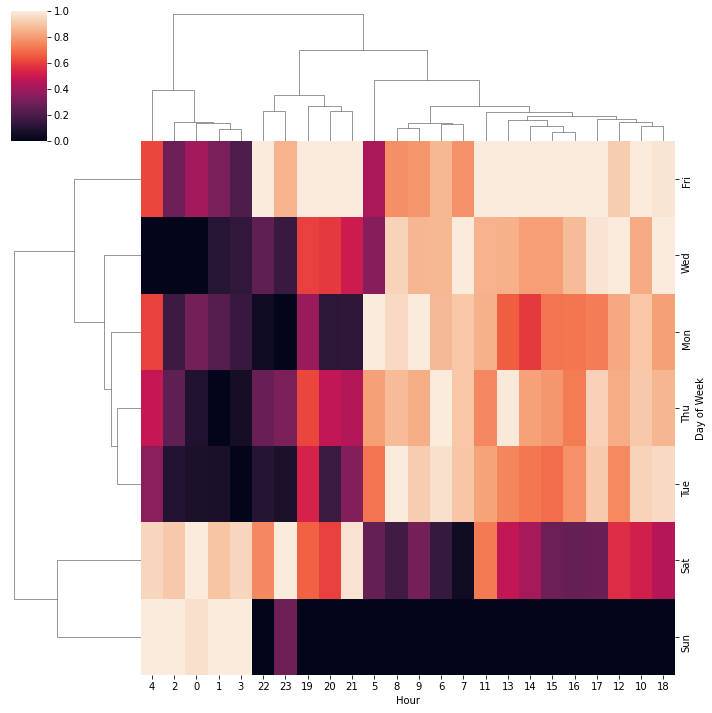

In [35]:
sns.clustermap(x,standard_scale=1)

In [36]:
z = df.groupby(by=['Day of Week','Month']).count()['reason'].unstack()

In [45]:
x = df.groupby(by=['Month','Day of Week','Hour']).count()['reason'].unstack()
pd.set_option('display.max_rows',500)
x

Hour                0    1    2    3    4    5    6    7    8    9   ...   14  \
Month Day of Week                                                    ...        
1     Fri          175  152  137  130  139  141  329  421  534  472  ...  587   
      Mon          185  126  154  127  125  145  234  383  542  523  ...  522   
      Sat          205  164  143  166  151  158  191  248  320  376  ...  489   
      Sun          221  212  207  134  183  176  228  274  343  416  ...  422   
      Thu          159  103  129  131  119  149  297  433  556  594  ...  516   
      Tue          173  138  151  139  130  171  324  446  603  515  ...  531   
      Wed          190  156  135  142  115  189  288  501  653  545  ...  562   
2     Fri          145  122  117   96  109  121  205  329  486  469  ...  538   
      Mon          214  142  123   95  159  227  297  451  486  516  ...  534   
      Sat          196  210  153  130  129  138  147  218  290  371  ...  442   
      Sun          210  173  181  143  105   94  121  212  266  285  ...  364   
      Thu          135  127  113  110  105  181  293  428  502  477  ...  464   
      Tue          130  118   82   96  122  143  261  434  499  466  ...  463   
      Wed          133  104  104   86   98  107  243  453  446  460  ...  451   
3     Fri          164  146  133  121  129  152  248  414  474  510  ...  766   
      Mon          166  138  139  115  104  179  242  377  445  501  ...  471   
      Sat          260  210  192  153  131  158  176  255  362  432  ...  425   
      Sun          201  227  103  141  118  111  127  189  245  300  ...  405   
      Thu          169  116  156  121  116  166  283  407  481  487  ...  505   
      Tue          142  123  125   94  104  156  235  372  505  495  ...  530   
      Wed          173  126  130  125  103  150  219  391  518  504  ...  638   
4     Fri          143  132  122   91  110  111  201  305  400  426  ...  454   
      Mon          133  140   97  100  115  133  262  440  503  497  ...  492   
      Sat          184  147  139  125  136  122  167  212  283  362  ...  492   
      Sun          211  171  196  121  140  145  164  214  270  359  ...  422   
      Thu          125  106  103   85   91  119  203  316  357  404  ...  510   
      Tue          138  114   89  102   97  112  229  350  413  439  ...  460   
      Wed          117  136   79   90  103  128  191  352  437  400  ...  480   
5     Fri          155  159  134  107  118  114  235  397  377  482  ...  547   
      Mon          149  139  113  123  121  146  213  333  435  436  ...  456   
      Sat          227  159  137  142  123  120  180  206  286  367  ...  442   
      Sun          199  160  145  137  129  119  156  197  257  327  ...  416   
      Thu          162  113  134  112  116  156  234  379  444  484  ...  554   
      Tue          167  145   98  108  100  114  225  385  521  506  ...  573   
      Wed          139  113  110  105   98  136  238  467  487  483  ...  531   
6     Fri          159  144  127  117  114  144  200  358  414  473  ...  532   
      Mon          194  145  116  114  106  136  194  396  480  465  ...  529   
      Sat          218  180  159  140  110  160  194  204  277  379  ...  499   
      Sun          187  176  156  122  106  115  145  188  254  303  ...  463   
      Thu          189  153  153  102  158  244  297  412  451  528  ...  579   
      Tue          157  122  107  110   94  169  223  376  448  442  ...  509   
      Wed          140   83  108   96   71  125  217  350  445  448  ...  669   
7     Fri          193  141  120  103  128  171  226  294  410  472  ...  592   
      Mon          173  168  120  112  108  176  198  336  464  561  ...  634   
      Sat          223  184  175  148  119  137  145  182  294  335  ...  451   
      Sun          225  222  186  165  169  156  153  248  257  364  ...  482   
      Thu          137  120  118  106  118  131  167  274  385  437  ...  489   
      Tue          161  153  14

In [72]:
x.loc[:,::-1]

Hour                23   22   21   20   19   18   17   16   15   14  ...   9   \
Month Day of Week                                                    ...        
1     Fri          255  318  350  358  422  518  703  509  597  587  ...  472   
      Mon          216  278  271  341  420  510  561  546  549  522  ...  523   
      Sat          268  260  320  360  468  473  499  459  498  489  ...  376   
      Sun          186  222  251  335  341  401  416  405  401  422  ...  416   
      Thu          216  239  330  327  403  492  641  511  560  516  ...  594   
      Tue          232  267  341  396  478  583  721  690  544  531  ...  515   
      Wed          177  245  317  350  453  558  630  558  560  562  ...  545   
2     Fri          219  284  283  328  416  472  533  549  556  538  ...  469   
      Mon          181  203  279  290  420  474  534  509  554  534  ...  516   
      Sat          242  282  356  380  459  446  396  448  448  442  ...  371   
      Sun          283  264  241  281  354  348  356  336  349  364  ...  285   
      Thu          170  218  267  333  377  457  480  489  493  464  ...  477   
      Tue          161  215  250  305  371  517  463  502  522  463  ...  466   
      Wed          210  294  377  426  409  507  522  523  519  451  ...  460   
3     Fri          280  363  421  491  570  601  776  895  808  766  ...  510   
      Mon          177  192  254  324  362  420  530  487  517  471  ...  501   
      Sat          239  267  356  378  377  431  457  448  456  425  ...  432   
      Sun          206  245  312  351  418  369  402  406  384  405  ...  300   
      Thu          202  239  309  383  440  434  611  591  600  505  ...  487   
      Tue          174  254  344  345  404  410  567  536  545  530  ...  495   
      Wed          190  236  295  357  440  427  539  616  689  638  ...  504   
4     Fri          226  269  305  367  376  460  546  612  514  454  ...  426   
      Mon          168  234  269  289  357  448  527  578  545  492  ...  497   
      Sat          258  281  306  351  350  447  441  455  449  492  ...  362   
      Sun          181  211  269  310  362  361  379  363  370  422  ...  359   
      Thu          171  226  268  369  346  426  523  534  550  510  ...  404   
      Tue          170  217  243  290  381  431  473  548  537  460  ...  439   
      Wed          164  202  259  317  341  445  551  526  524  480  ...  400   
5     Fri          245  316  374  415  428  454  535  578  641  547  ...  482   
      Mon          166  214  283  321  343  433  511  599  591  456  ...  436   
      Sat          252  280  290  348  373  362  422  442  347  442  ...  367   
      Sun          209  227  281  322  295  342  370  423  418  416  ...  327   
      Thu          185  253  317  350  445  441  612  608  559  554  ...  484   
      Tue          173  214  308  376  407  559  732  597  629  573  ...  506   
      Wed          198  253  358  439  434  579  672  634  580  531  ...  483   
6     Fri          278  296  377  402  471  473  578  698  671  532  ...  473   
      Mon          169  242  293  342  428  464  546  559  564  529  ...  465   
      Sat          285  349  395  366  415  483  507  535  474  499  ...  379   
      Sun          198  228  277  353  359  393  394  450  377  463  ...  303   
      Thu          245  267  343  337  400  474  643  657  621  579  ...  528   
      Tue          195  277  295  338  391  514  587  560  540  509  ...  442   
      Wed          226  279  331  357  401  516  700  710  624  669  ...  448   
7     Fri          210  298  344  361  410  463  573  565  554  592  ...  472   
      Mon          181  271  372  460  466  591  656  627  659  634  ...  561   
      Sat          248  282  388  377  438  477  516  477  427  451  ...  335   
      Sun          220  286  360  397  419  457  452  422  482  482  ...  364   
      Thu          204  264  340  353  477  556  651  582  558  489  ...  437   
      Tue          211  271  37

In [74]:
# 0,3,4,1,2
x.loc[[1,5,2,7,10],[0,3,4,1,2]]

Hour                 0    3    4    1    2
Month Day of Week                         
1     Fri          175  130  139  152  137
      Mon          185  127  125  126  154
      Sat          205  166  151  164  143
      Sun          221  134  183  212  207
      Thu          159  131  119  103  129
      Tue          173  139  130  138  151
      Wed          190  142  115  156  135
5     Fri          155  107  118  159  134
      Mon          149  123  121  139  113
      Sat          227  142  123  159  137
      Sun          199  137  129  160  145
      Thu          162  112  116  113  134
      Tue          167  108  100  145   98
      Wed          139  105   98  113  110
2     Fri          145   96  109  122  117
      Mon          214   95  159  142  123
      Sat          196  130  129  210  153
      Sun          210  143  105  173  181
      Thu          135  110  105  127  113
      Tue          130   96  122  118   82
      Wed          133   86   98  104  104
7     Fri          193  103  128  141  120
      Mon          173  112  108  168  120
      Sat          223  148  119  184  175
      Sun          225  165  169  222  186
      Thu          137  106  118  120  118
      Tue          161  123  128  153  142
      Wed          132  137   93  154  111
10    Fri          116   85   75   99   87
      Mon          136  136  109   99  116
      Sat          179  115  105  150  152
      Sun          181  125  122  164  157
      Thu          108   83  115   83   82
      Tue          135   98  103  101  104
      Wed          127   89   87  110  114

In [46]:
x.loc[[5,2], ]

Hour                0    1    2    3    4    5    6    7    8    9   ...   14  \
Month Day of Week                                                    ...        
5     Fri          155  159  134  107  118  114  235  397  377  482  ...  547   
      Mon          149  139  113  123  121  146  213  333  435  436  ...  456   
      Sat          227  159  137  142  123  120  180  206  286  367  ...  442   
      Sun          199  160  145  137  129  119  156  197  257  327  ...  416   
      Thu          162  113  134  112  116  156  234  379  444  484  ...  554   
      Tue          167  145   98  108  100  114  225  385  521  506  ...  573   
      Wed          139  113  110  105   98  136  238  467  487  483  ...  531   
2     Fri          145  122  117   96  109  121  205  329  486  469  ...  538   
      Mon          214  142  123   95  159  227  297  451  486  516  ...  534   
      Sat          196  210  153  130  129  138  147  218  290  371  ...  442   
      Sun          210  173  181  143  105   94  121  212  266  285  ...  364   
      Thu          135  127  113  110  105  181  293  428  502  477  ...  464   
      Tue          130  118   82   96  122  143  261  434  499  466  ...  463   
      Wed          133  104  104   86   98  107  243  453  446  460  ...  451   

Hour                15   16   17   18   19   20   21   22   23  
Month Day of Week                                               
5     Fri          641  578  535  454  428  415  374  316  245  
      Mon          591  599  511  433  343  321  283  214  166  
      Sat          347  442  422  362  373  348  290  280  252  
      Sun          418  423  370  342  295  322  281  227  209  
      Thu          559  608  612  441  445  350  317  253  185  
      Tue          629  597  732  559  407  376  308  214  173  
      Wed          580  634  672  579  434  439  358  253  198  
2     Fri          556  549  533  472  416  328  283  284  219  
      Mon          554  509  534  474  420  290  279  203  181  
      Sat          448  448  396  446  459  380  356  282  242  
      Sun          349  336  356  348  354  281  241  264  283  
      Thu          493  489  480  457  377  333  267  218  170  
      Tue          522  502  463  517  371  305  250  215  161  
      Wed          519  523  522  507  409  426  377  294  210  

[14 rows x 24 columns]

In [50]:
x.loc[:, [5,2]]

Hour                 5    2
Month Day of Week          
1     Fri          141  137
      Mon          145  154
      Sat          158  143
      Sun          176  207
      Thu          149  129
      Tue          171  151
      Wed          189  135
2     Fri          121  117
      Mon          227  123
      Sat          138  153
      Sun           94  181
      Thu          181  113
      Tue          143   82
      Wed          107  104
3     Fri          152  133
      Mon          179  139
      Sat          158  192
      Sun          111  103
      Thu          166  156
      Tue          156  125
      Wed          150  130
4     Fri          111  122
      Mon          133   97
      Sat          122  139
      Sun          145  196
      Thu          119  103
      Tue          112   89
      Wed          128   79
5     Fri          114  134
      Mon          146  113
      Sat          120  137
      Sun          119  145
      Thu          156  134
      Tue          114   98
      Wed          136  110
6     Fri          144  127
      Mon          136  116
      Sat          160  159
      Sun          115  156
      Thu          244  153
      Tue          169  107
      Wed          125  108
7     Fri          171  120
      Mon          176  120
      Sat          137  175
      Sun          156  186
      Thu          131  118
      Tue          147  142
      Wed          162  111
8     Fri          104  127
      Mon          134  100
      Sat          119  136
      Sun           92  156
      Thu          126  125
      Tue          141  106
      Wed          119   94
9     Fri          159  117
      Mon          125   79
      Sat          107  141
      Sun           98  177
      Thu          104   87
      Tue          134   96
      Wed          113   97
10    Fri          113   87
      Mon          150  116
      Sat           83  152
      Sun          137  157
      Thu          130   82
      Tue          149  104
      Wed          134  114
11    Fri          164   94
      Mon          108   84
      Sat          119  192
      Sun           96   79
      Thu          120  114
      Tue          125   99
      Wed          116   78
12    Fri          145  134
      Mon          185  127
      Sat          159  164
      Sun          149  203
      Thu          149  112
      Tue          180  123
      Wed          130   99

In [52]:
x.loc[:, [5,2]][2]

Month  Day of Week
1      Fri            137
       Mon            154
       Sat            143
       Sun            207
       Thu            129
       Tue            151
       Wed            135
2      Fri            117
       Mon            123
       Sat            153
       Sun            181
       Thu            113
       Tue             82
       Wed            104
3      Fri            133
       Mon            139
       Sat            192
       Sun            103
       Thu            156
       Tue            125
       Wed            130
4      Fri            122
       Mon             97
       Sat            139
       Sun            196
       Thu            103
       Tue             89
       Wed             79
5      Fri            134
       Mon            113
       Sat            137
       Sun            145
       Thu            134
       Tue             98
       Wed            110
6      Fri            127
       Mon            116
       Sat         

In [59]:
x.loc[[5,2], :][2][2]

Day of Week
Fri    117
Mon    123
Sat    153
Sun    181
Thu    113
Tue     82
Wed    104
Name: 2, dtype: int64

In [64]:
x.loc[:, :][1][1]

Day of Week
Fri    152
Mon    126
Sat    164
Sun    212
Thu    103
Tue    138
Wed    156
Name: 1, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

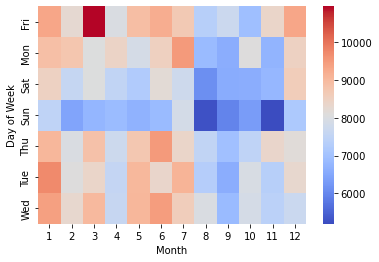

In [47]:
sns.heatmap(z, cmap = 'coolwarm')

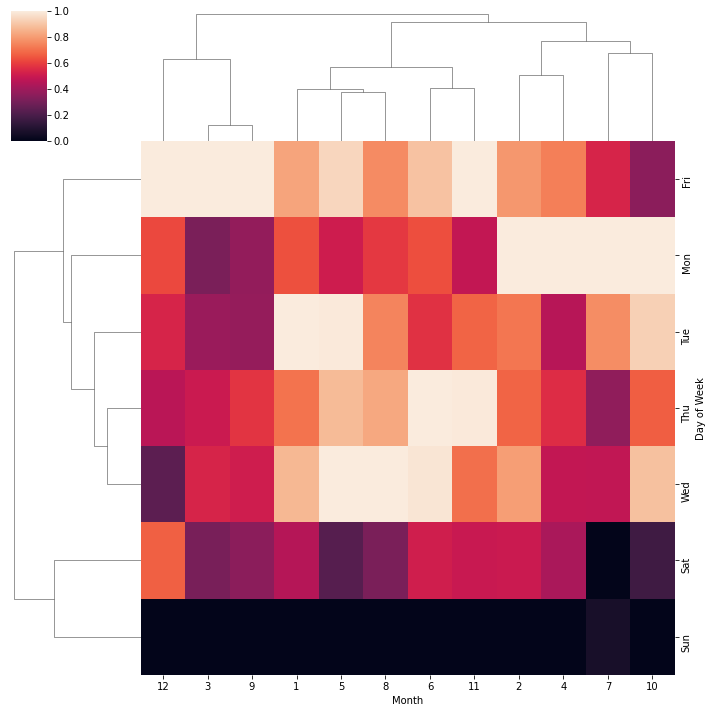

In [48]:
sns.clustermap(z,standard_scale=1)